In [7]:
!wget https://raw.githubusercontent.com/Atcold/pytorch-Deep-Learning/master/res/plot_lib.py

--2020-09-19 16:35:50--  https://raw.githubusercontent.com/Atcold/pytorch-Deep-Learning/master/res/plot_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4399 (4.3K) [text/plain]
Saving to: ‘plot_lib.py’

plot_lib.py         100%[===================>]   4.30K  --.-KB/s    in 0s      

2020-09-19 16:35:50 (54.6 MB/s) - ‘plot_lib.py’ saved [4399/4399]



In [8]:
# Load libraries
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [ ]:
torch.cuda.is_available()

False

In [2]:
torch.cuda.is_available()


True

Check if the device has GPU support. Change the runtime type to choose GPU/TPU. We can cast all the model and variables to GPU support on colab. We cannot continously store the weights so we add checkpoints to the model where we take the snapshot of the weights and save it to drive(in case connection gets cut)

Mount the google drive on runtime- provide the code manually by copying the code generated.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wE-gE_GgGh2O7xeQD9zgDpDWl8eS8J1MS2Gbw64DGGLYRV2CFGpVVI
Mounted at /content/drive


The below line is how we cast to GPU, the device on which device we will be running: either CUDA or CPU

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

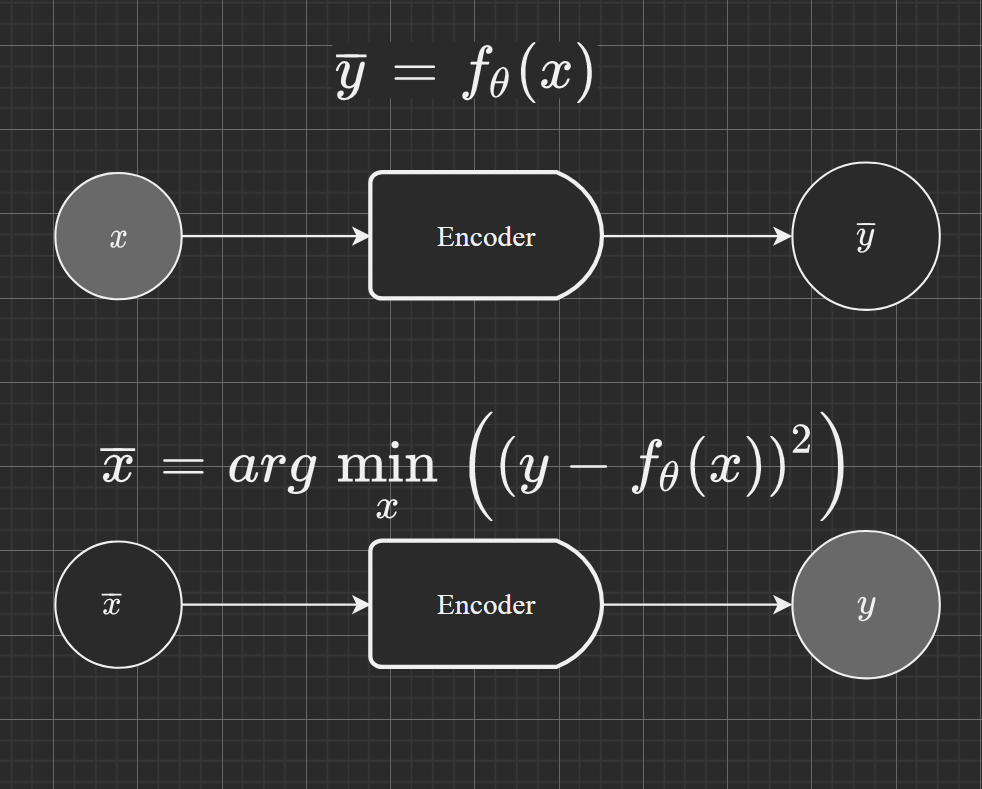


The top diagram shows `bar(y)` as a function of x. The second diagram shows, in order to produce x( given here by `bar(x)`), what is the value of input, that would produce the known output. Grey represents the known term.

Generating 1000 points in 2-D 

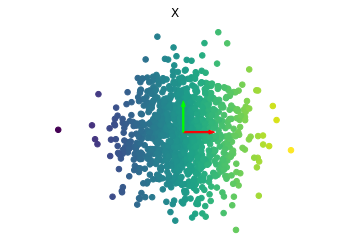

In [9]:
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

# Visualizing Linear Transformations

* Generate a random matrix $W$

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 & 0 \\
   0 & s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$
* Compute $y = Wx$
* Here $D$ is the diagonal matrix where the diagonal elements define the extent of strech in that particular direction
* Larger singular values stretch the points
* Smaller singular values push them together
* $U, V$ rotate/reflect

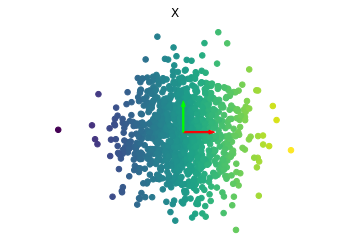

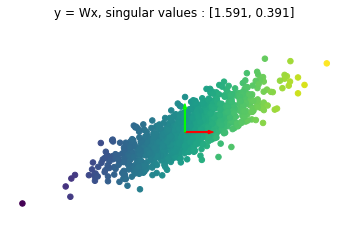

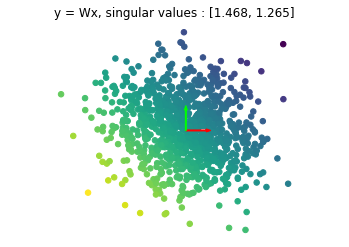

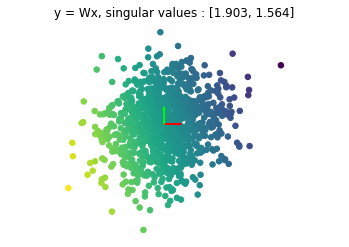

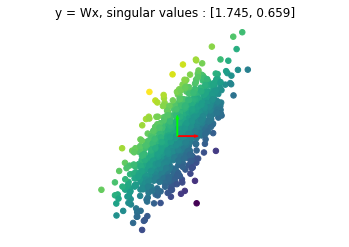

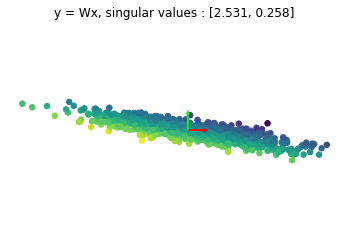

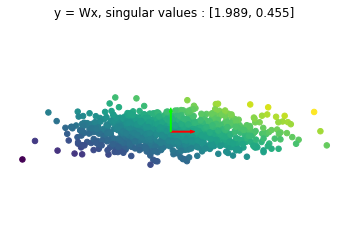

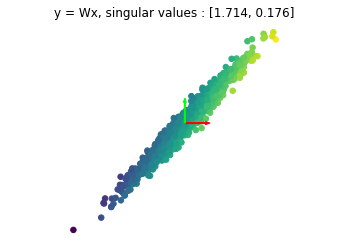

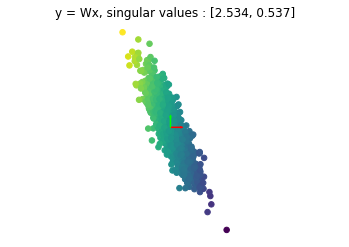

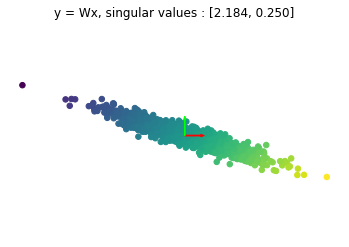

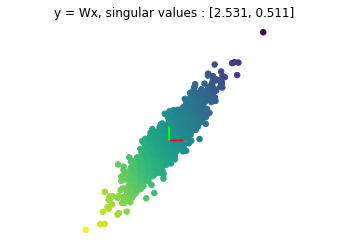

In [10]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W
    # plot old and new basis
    plot_bases(OI)
#     plot_bases(new_OI)

####Visualizations of Matrix multiplication 
Consider a Normal distribution points with $X$ axis as red($i$) and Y axis as green($j$). The expected radius is 3(the probability of gettig a point within -3 to 3 is within 2 standard deviations that correspond to 99.78% of the data samples)

Applying linear transformations on the data

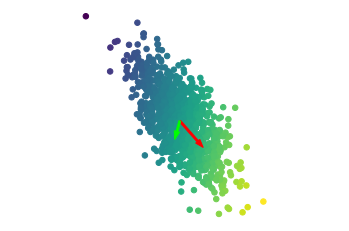

In [11]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

#Non linear transformation

To additionally add expressivity in the model, we add non-linearity like RELU, $tanh()$

We can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a $tanh$ function

$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s & 0 \\
   0 & s \\
  \end{array} } \right]  
  x
  \right)
$

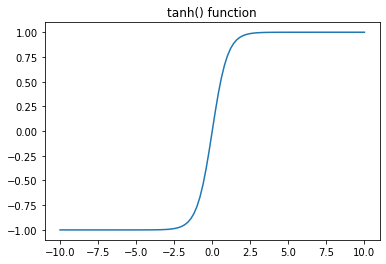

In [12]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() function');

For different values of $s$, we can observe how the $tanh()$ function saturates the points to $s$, more points are pushed to the edges.

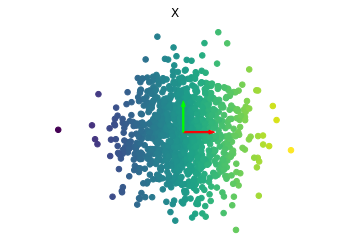

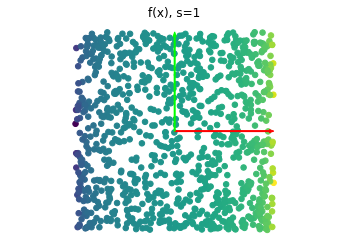

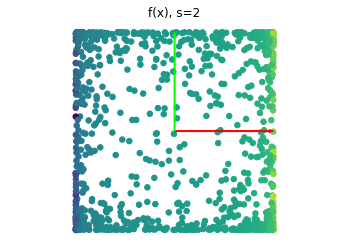

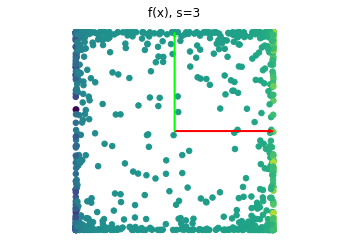

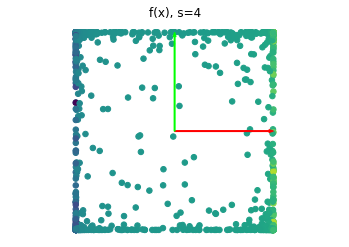

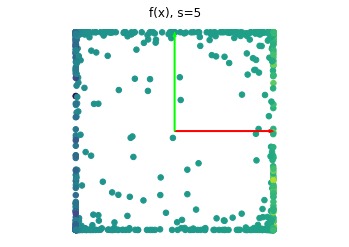

In [13]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

##Visualization of the functions represented by Neural networks

1. By using RELU as the non-linearity with one hidden layer
2. By using $tanh()$ as the non-linearity

Here the weights are initialised randomly

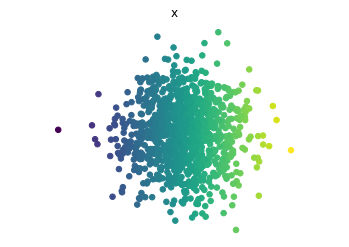

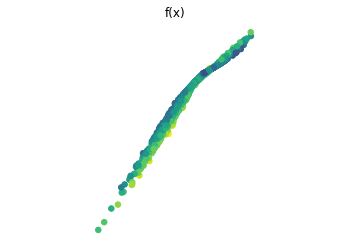

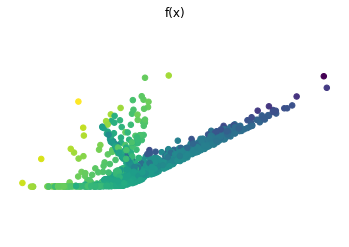

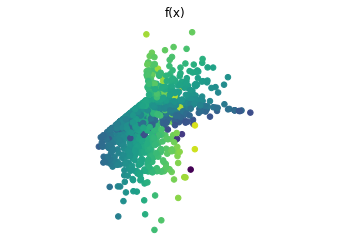

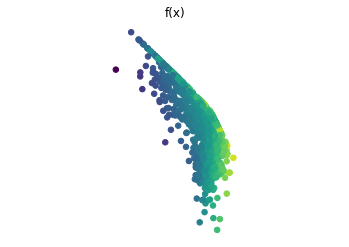

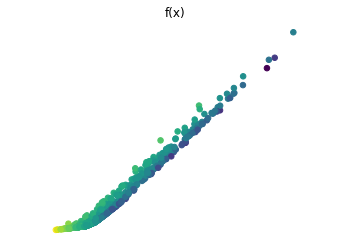

In [14]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

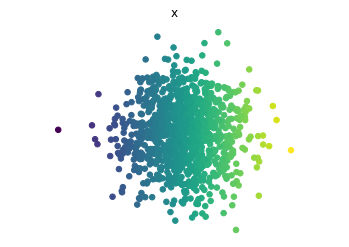

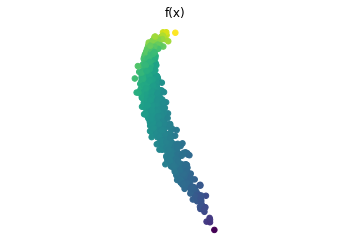

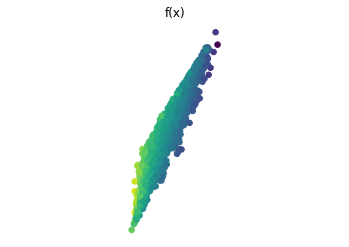

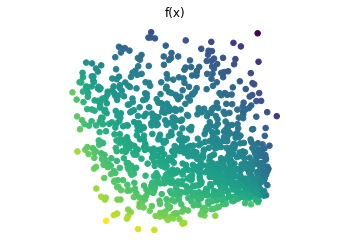

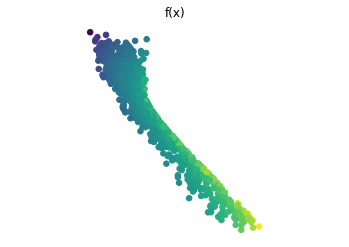

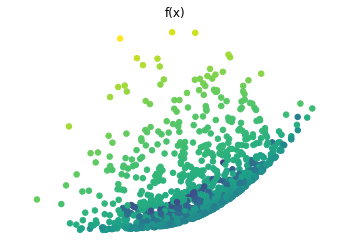

In [15]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

####Deeper networks

Linear tranformations: scaling, translation, reflection, shear

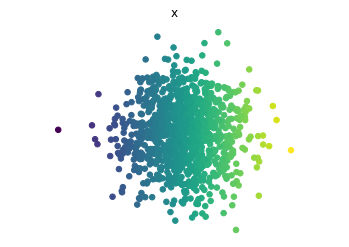

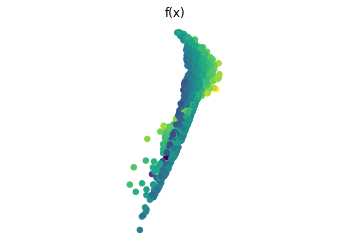

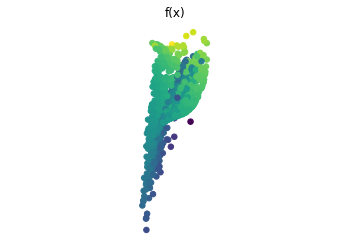

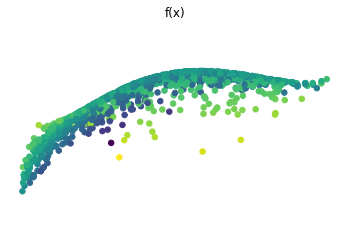

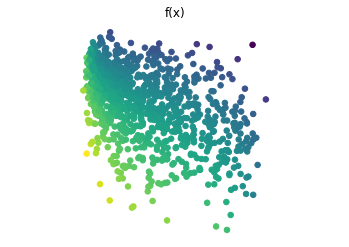

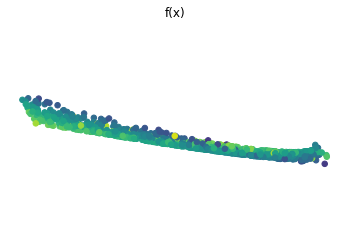

In [16]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5


NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

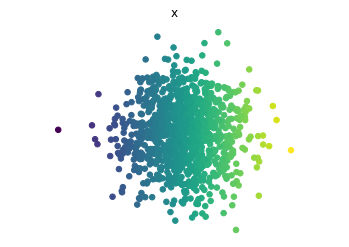

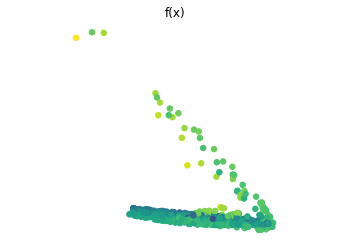

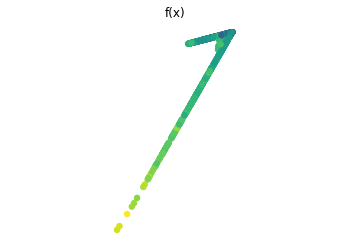

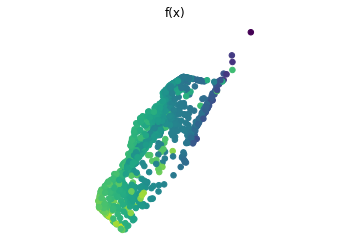

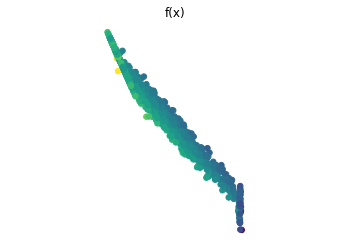

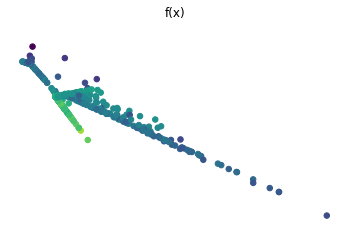

In [19]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()


for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL,
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

_Observation_: _Edge on the graph when RELU function is used_

Angle of the axis, negative cloud points is sliced to 0(which corresponds to the dense points on the edges)


It's interesting how the non-linear function morphs/transforms the points arbitrarily on 2D space.

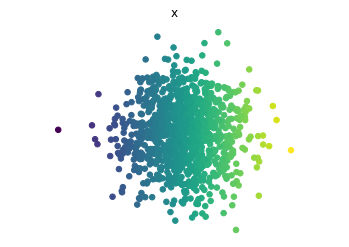

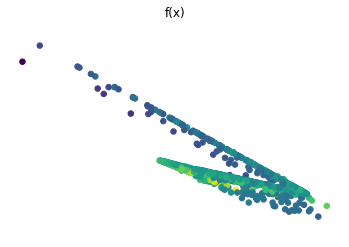

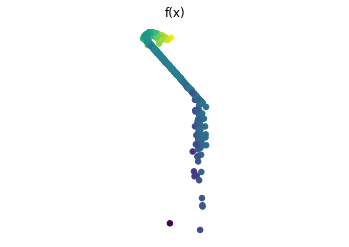

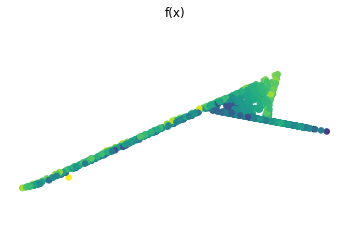

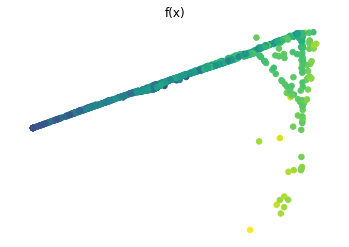

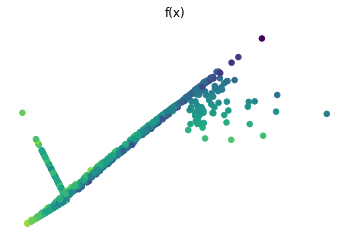

In [20]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()


for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL,
        nn.Linear(n_hidden, n_hidden),
        NL,
        nn.Linear(n_hidden, n_hidden),
        NL,
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')

Next notebook will cover how to enforce the network to transform the points such that they are linearly separable in a given space.